# House Price - Linear Regression

## Parte 05 - EDA - Verificando os dados depois da segunda transformação

#### > Importação das Bibliotecas

Download da Biblioteca **Missingno**

In [1]:
conda install -c conda-forge/label/gcc7 missingno

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
#import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns

#### > Carregamento do Dataset

Carregamento do dataset **'house_price.csv'**. O comando 'set_option' permite que a tabela seja apresentada sem simplicação 

In [3]:
df = pd.read_csv('house_price.csv')
pd.set_option('max_columns', None)

#### Legenda

**id** - ID \
**date** - Dia da Venda \
**price** - Preço da Venda \
**bedrooms** - Número de quartos \
**bathrooms** - Número de banheiros, onde 0,5 corresponde a um lavabo \
**sqft_living** - Metragem quadrada da área interna \
**sqft_lot** - Metragem quadrada do Terreno \
**floors** - Número de andares \
**waterfront** - Se a casa é de frente para o mar \
**view** - Um índice de 0 a 4 de qualidade da vista \
**condition** - Um índice de 1 a 5 sobre a condição da casa \
**grade** - Um índice de 1 a 13, onde 1-3 tem uma construção e design do edifício de baixa qualidade, 7 tem um nível médio de construção e design e 11-13 tem um nível de construção e design de alta qualidade \
**sqft_above** - A metragem quadrada do espaço habitacional interior que está acima do nível do solo \
**sqft_basement** - A metragem quadrada do espaço habitacional interior que está abaixo do nível do solo \
**yr_built** - Ano de Construção \
**yr_renovated** - Ano de Reforma \
**zipcode** - Código Postal \
**lat** - Latitude \
**long** - Longitude \
**sqft_living15** - A metragem quadrada do espaço interno da casa para os 15 vizinhos mais próximos \
**sqft_lot15** - A metragem quadrada dos lotes de terreno dos 15 vizinhos mais próximos 

#### > Verificação do Dataset

Verificação do tamanho do Dataset

In [4]:
df.shape

(19450, 23)

Features do modelo

In [5]:
df.columns

Index(['date', 'day', 'month', 'year', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'age_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Verificando as informações do Dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19450 entries, 0 to 19449
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           19450 non-null  object 
 1   day            19450 non-null  int64  
 2   month          19450 non-null  int64  
 3   year           19450 non-null  int64  
 4   price          19450 non-null  float64
 5   bedrooms       19450 non-null  float64
 6   bathrooms      19450 non-null  float64
 7   sqft_living    19450 non-null  float64
 8   sqft_lot       19450 non-null  float64
 9   floors         19450 non-null  float64
 10  waterfront     19450 non-null  int64  
 11  view           19450 non-null  int64  
 12  condition      19450 non-null  int64  
 13  grade          19450 non-null  int64  
 14  sqft_above     19450 non-null  float64
 15  sqft_basement  19450 non-null  int64  
 16  age_built      19450 non-null  float64
 17  yr_renovated   19450 non-null  int64  
 18  zipcod

Nessa primeira informação, podemos ver que o nosso dataset se encontra sem valores nulo, isso pode ser percebido pela presença de valores iguais em todas as features.

Avaliando o dataset de forma aleatória

In [7]:
df.sample(5)

,date,day,month,year,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,age_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3323,2015-04-15,15,4,2015,1240000.0,4.0,3.00,3010.0,6139.0,2.0,0,4,5,8,2560.0,450,65.0,1972,98115,47.6799,-122.268,2100.0,6798.0
1578,2014-12-10,10,12,2014,355000.0,3.0,1.00,1240.0,5400.0,1.0,0,0,4,7,1060.0,180,74.0,0,98133,47.7115,-122.355,1429.0,5400.0
5797,2014-10-05,5,10,2014,250800.0,3.0,1.75,1290.0,4000.0,1.0,0,0,3,6,1170.0,120,71.0,0,98106,47.5309,-122.354,1140.0,4000.0
12993,2014-09-17,17,9,2014,325000.0,3.0,1.00,1150.0,7486.0,1.0,0,0,3,7,1150.0,0,44.0,0,98034,47.7261,-122.219,1510.0,7486.0
7863,2014-05-09,9,5,2014,1370000.0,4.0,2.75,3720.0,9450.0,1.0,0,4,5,10,1960.0,1760,52.0,0,98006,47.5627,-122.156,2900.0,8605.0


Verificando a existencia de dados duplicados na coluna **'ID'**

In [8]:
df.nunique()

date              370
day                31
month              12
year                2
price            3750
bedrooms            7
bathrooms          20
sqft_living       876
sqft_lot         8224
floors              6
waterfront          2
view                5
condition           5
grade              10
sqft_above        811
sqft_basement     269
age_built         116
yr_renovated       69
zipcode            70
lat              4847
long              639
sqft_living15     685
sqft_lot15       7164
dtype: int64

Como podemos avaliar, o **'ID'** não apresenta valores unicos para o df, com isso, não podemos usar ele como index. Assim sendo, decidi retirar essa feature do nosso dataset

In [9]:
df.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,day,month,year,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,age_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,19450.00000,19450.00000,19450.00000,19450.00000,19450.00000,19450.00000,19450.00000,19450.00000,19450.00000,19450.00000,19450.00000,19450.00000,19450.00000,19450.00000,19450.00000,19450.00000,19450.00000,19450.00000,19450.00000,19450.00000,19450.00000,19450.00000
mean,15.71599,6.56848,2014.32535,514584.51985,3.33630,2.06874,1985.82776,7914.30581,1.48596,0.00524,0.21116,3.41290,7.56437,1702.11650,283.71126,44.24879,80.46082,98080.68627,47.56209,-122.22721,1915.92468,7362.87707
std,8.63090,3.12129,0.46852,314096.16649,0.87420,0.73075,801.83618,5290.33328,0.54376,0.07223,0.72026,0.65409,1.08035,728.59912,419.98172,29.98131,392.62467,54.25832,0.13648,0.13250,625.53500,3425.10732
min,1.00000,1.00000,2014.00000,78000.00000,0.00000,0.00000,370.00000,520.00000,1.00000,0.00000,0.00000,1.00000,3.00000,370.00000,0.00000,0.00000,0.00000,98001.00000,47.15590,-122.50300,460.00000,651.00000
25%,8.00000,4.00000,2014.00000,315000.00000,3.00000,1.50000,1390.00000,4960.00000,1.00000,0.00000,0.00000,3.00000,7.00000,1170.00000,0.00000,17.00000,0.00000,98033.00000,47.47933,-122.33400,1460.00000,5000.00000
50%,16.00000,6.00000,2014.00000,439000.00000,3.00000,2.25000,1850.00000,7227.00000,1.00000,0.00000,0.00000,3.00000,7.00000,1510.00000,0.00000,42.00000,0.00000,98074.00000,47.57290,-122.26200,1790.00000,7296.50000
75%,23.00000,9.00000,2015.00000,620000.00000,4.00000,2.50000,2440.00000,9600.00000,2.00000,0.00000,0.00000,4.00000,8.00000,2090.00000,550.00000,64.00000,0.00000,98118.00000,47.67870,-122.15100,2260.00000,9212.75000
max,31.00000,12.00000,2015.00000,3650000.00000,6.00000,5.00000,5490.00000,72309.00000,3.50000,1.00000,4.00000,5.00000,12.00000,5450.00000,2580.00000,115.00000,2015.00000,98199.00000,47.77760,-121.31500,4495.00000,19998.00000


#### > Gráficos

Esse primeiro grafico é uma forma sutil de avaliar se podemos avaliar correlação entre as features

##### > **Gráfico das features**

**BEDROOMS**

C:\Users\Vithep\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Bedrooms')

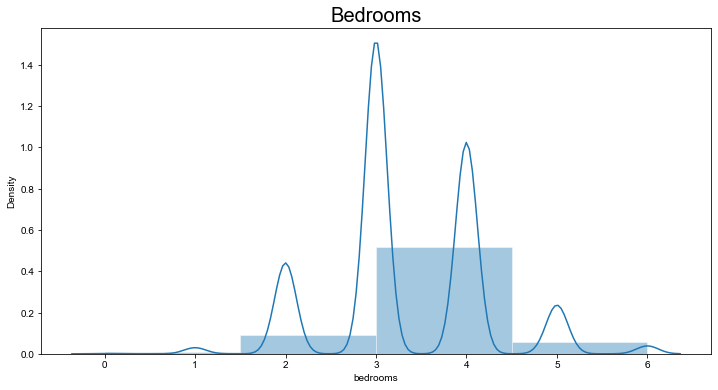

In [10]:
fig,ax = plt.subplots()
sns.set(style='whitegrid')
fig.set_size_inches(12,6)
ax = sns.distplot(df['bedrooms'], bins=4)
ax.set_title('Bedrooms',fontsize=20)

C:\Users\Vithep\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Quantidade Total')

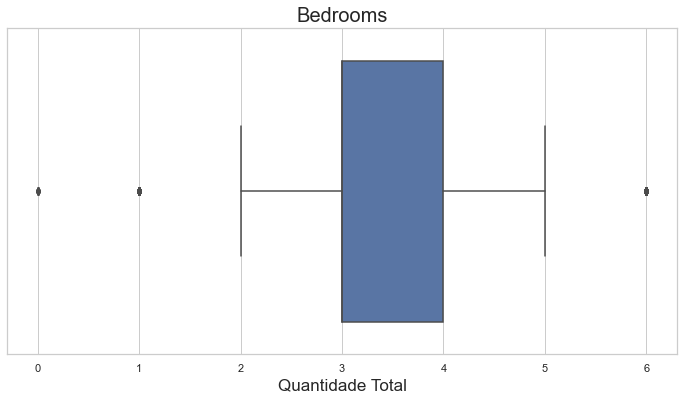

In [11]:
fig,ax = plt.subplots()
sns.set(style='whitegrid')
fig.set_size_inches(12,6)
ax = sns.boxplot(df['bedrooms'])
ax.set_title('Bedrooms',fontsize=20)
ax.set_xlabel('Quantidade Total',fontsize=17)

[]

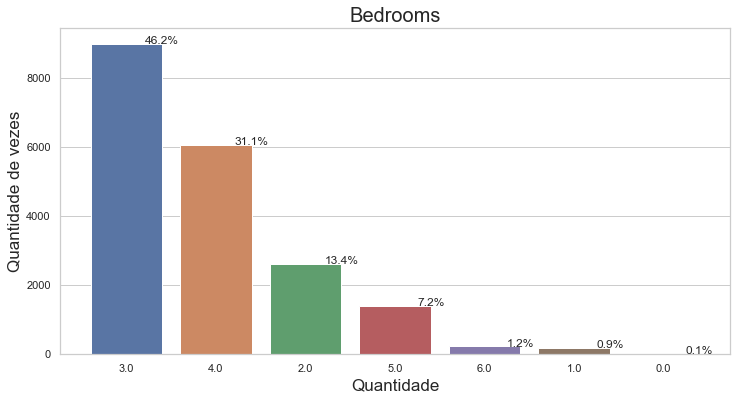

In [12]:
fig,ax = plt.subplots()
sns.set(style='darkgrid')
fig.set_size_inches(12,6)
ax = sns.countplot(x='bedrooms', data=df, order = df['bedrooms'].value_counts().iloc[:10].index)
ax.set_ylabel('Quantidade de vezes',fontsize=17)
ax.set_title('Bedrooms',fontsize=20)
ax.set_xlabel('Quantidade',fontsize=17)

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/df['bedrooms'].count())
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

plt.plot()

Podemos observar que possuimos mais casas vendidas com 2 a 5 quartos disponíveis

**BATHROOMS**

C:\Users\Vithep\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Bathrooms')

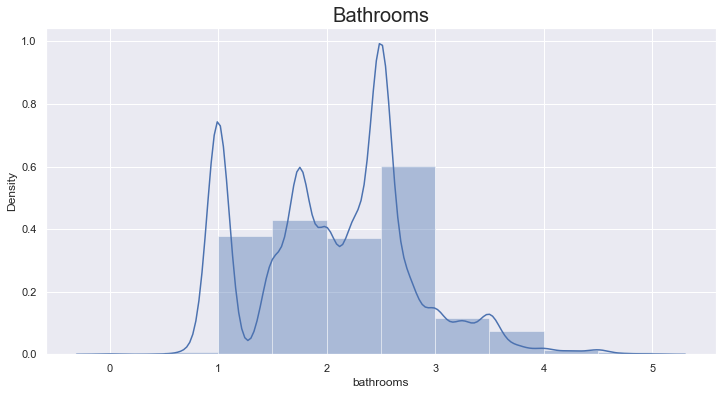

In [13]:
fig,ax = plt.subplots()
sns.set(style='whitegrid')
fig.set_size_inches(12,6)
ax = sns.distplot(df['bathrooms'], bins= 10)
ax.set_title('Bathrooms',fontsize=20)

C:\Users\Vithep\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Quantidade Total')

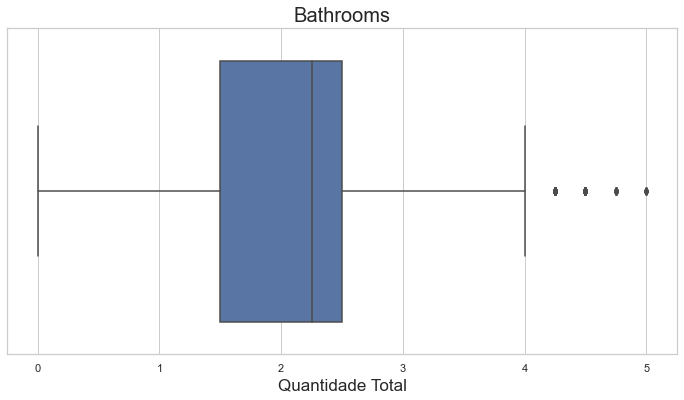

In [14]:
fig,ax = plt.subplots()
sns.set(style='whitegrid')
fig.set_size_inches(12,6)
ax = sns.boxplot(df['bathrooms'])
ax.set_title('Bathrooms',fontsize=20)
ax.set_xlabel('Quantidade Total',fontsize=17)

[]

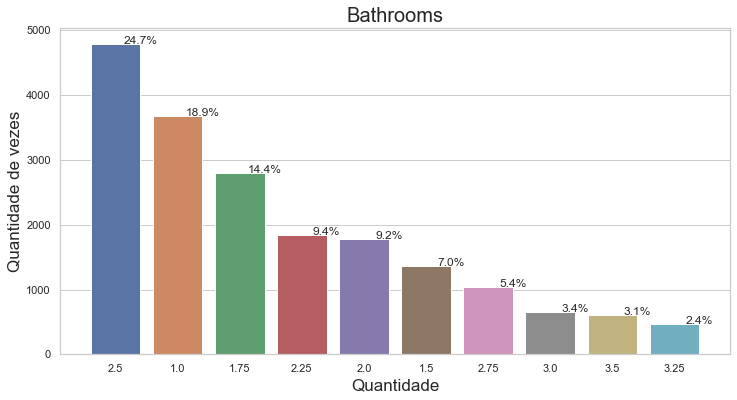

In [15]:
fig,ax = plt.subplots()
sns.set(style='darkgrid')
fig.set_size_inches(12,6)
ax = sns.countplot(x='bathrooms', data=df, order = df['bathrooms'].value_counts().iloc[:10].index)
ax.set_ylabel('Quantidade de vezes',fontsize=17)
ax.set_title('Bathrooms',fontsize=20)
ax.set_xlabel('Quantidade',fontsize=17)

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/df['bathrooms'].count())
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

plt.plot()

Podemos observar que possuimos mais casas vendidas com 1 a 3 banheiros disponíveis

**SQFT_LIVING**

C:\Users\Vithep\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Espaço')

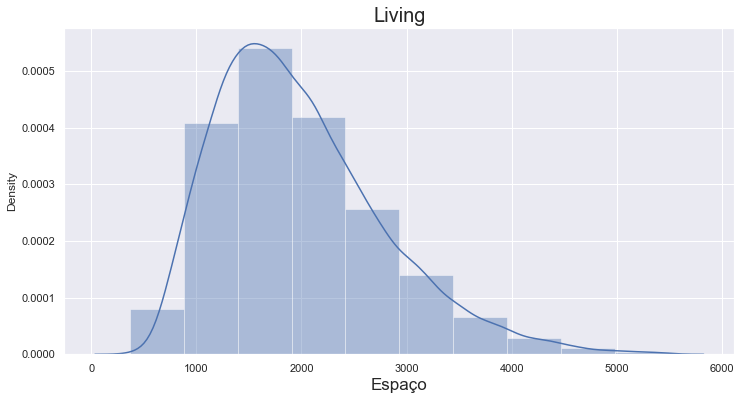

In [16]:
fig,ax = plt.subplots()
sns.set(style='whitegrid')
fig.set_size_inches(12,6)
ax = sns.distplot(df['sqft_living'], bins= 10)
ax.set_title('Living',fontsize=20)
ax.set_xlabel('Espaço',fontsize=17)

**SQFT_LIVING15**

C:\Users\Vithep\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Espaço')

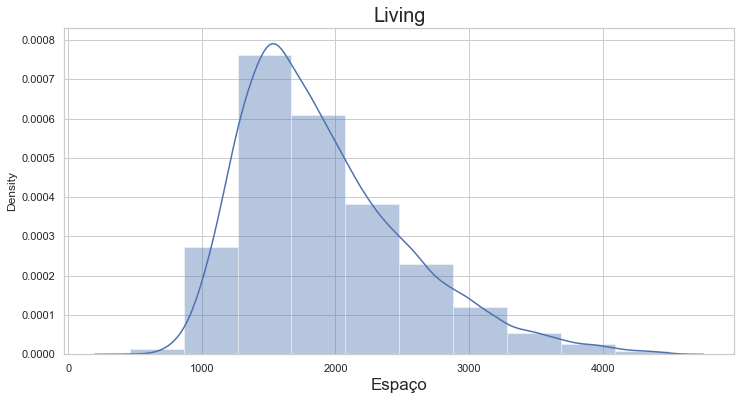

In [17]:
fig,ax = plt.subplots()
sns.set(style='whitegrid')
fig.set_size_inches(12,6)
ax = sns.distplot(df['sqft_living15'], bins= 10)
ax.set_title('Living',fontsize=20)
ax.set_xlabel('Espaço',fontsize=17)

C:\Users\Vithep\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Espaço')

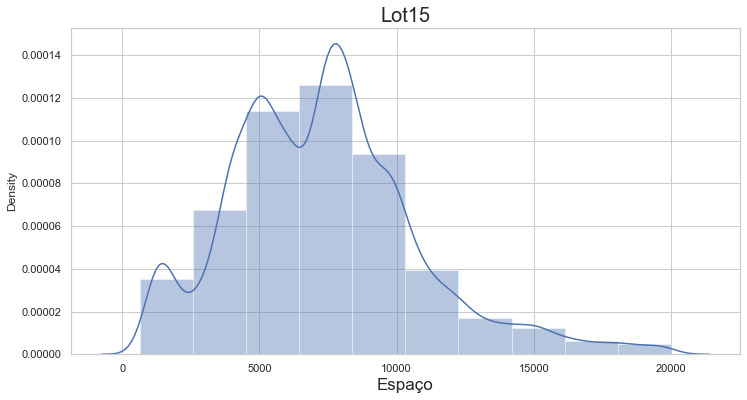

In [18]:
fig,ax = plt.subplots()
sns.set(style='whitegrid')
fig.set_size_inches(12,6)
ax = sns.distplot(df['sqft_lot15'], bins= 10)
ax.set_title('Lot15',fontsize=20)
ax.set_xlabel('Espaço',fontsize=17)

**FLOORS**

C:\Users\Vithep\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Quantidade Total')

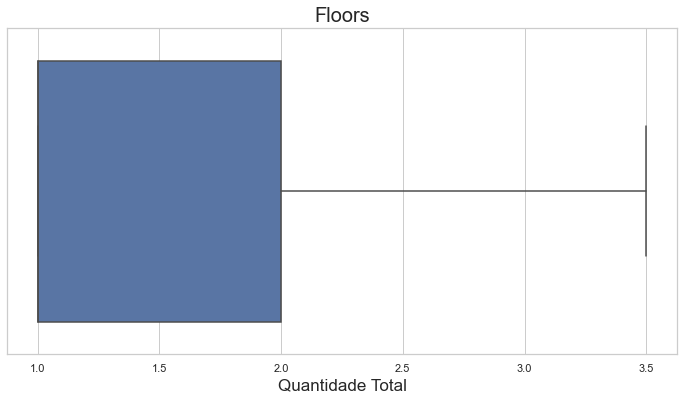

In [19]:
fig,ax = plt.subplots()
sns.set(style='whitegrid')
fig.set_size_inches(12,6)
ax = sns.boxplot(df['floors'])
ax.set_title('Floors',fontsize=20)
ax.set_xlabel('Quantidade Total',fontsize=17)

[]

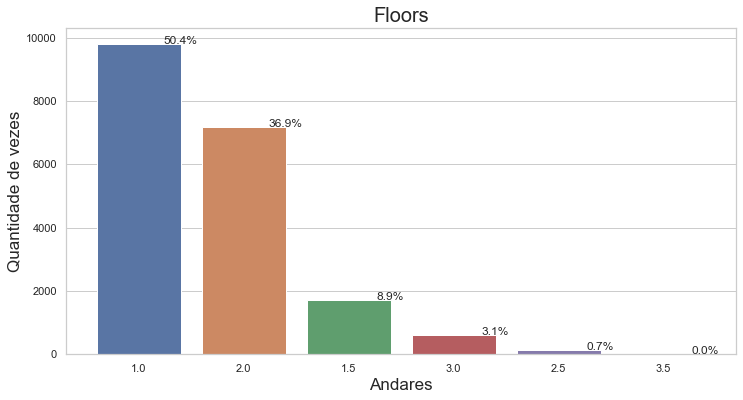

In [20]:
fig,ax = plt.subplots()
sns.set(style='darkgrid')
fig.set_size_inches(12,6)
ax = sns.countplot(x='floors', data=df, order = df['floors'].value_counts().iloc[:10].index)
ax.set_ylabel('Quantidade de vezes',fontsize=17)
ax.set_title('Floors',fontsize=20)
ax.set_xlabel('Andares',fontsize=17)

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/df['floors'].count())
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

plt.plot()

Podemos perceber que grande parte do dataset apresenta entre 1 a 2 andares

**WATERFRONT**

[]

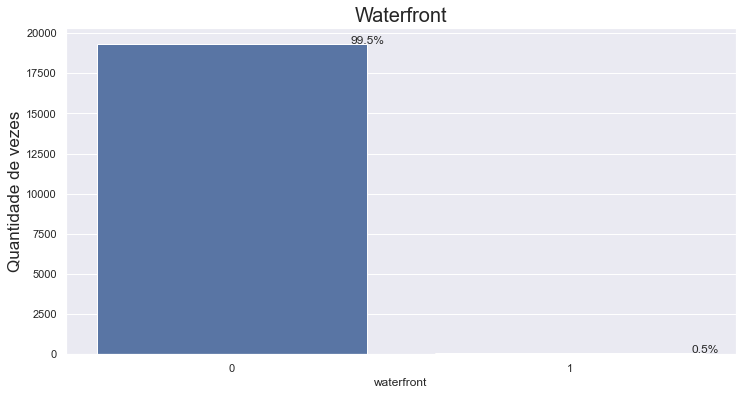

In [21]:
fig,ax = plt.subplots()
sns.set(style='darkgrid')
fig.set_size_inches(12,6)
ax = sns.countplot(x='waterfront', data=df, order = df['waterfront'].value_counts().iloc[:10].index)
ax.set_ylabel('Quantidade de vezes',fontsize=17)
ax.set_title('Waterfront',fontsize=20)

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/df['floors'].count())
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

plt.plot()

Podemos ver que grande parte das casas não possuem vista para o mar

**VIEW**

[]

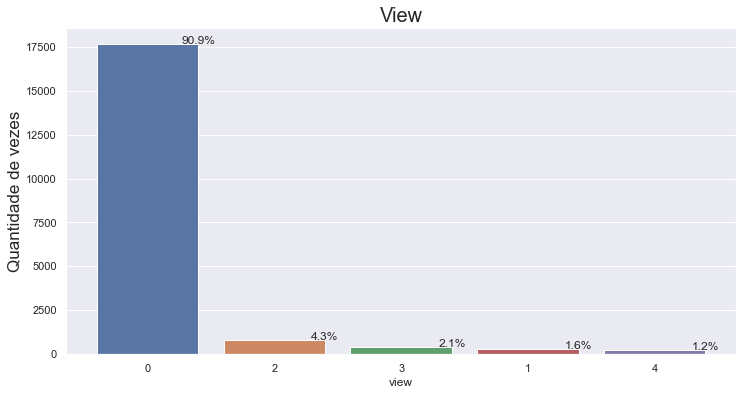

In [22]:
fig,ax = plt.subplots()
sns.set(style='darkgrid')
fig.set_size_inches(12,6)
ax = sns.countplot(x='view', data=df, order = df['view'].value_counts().iloc[:10].index)
ax.set_ylabel('Quantidade de vezes',fontsize=17)
ax.set_title('View',fontsize=20)

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/df['view'].count())
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

plt.plot()

A maioria das casas de casas recebeu 0 nota da vista 

**CONDITION**

[]

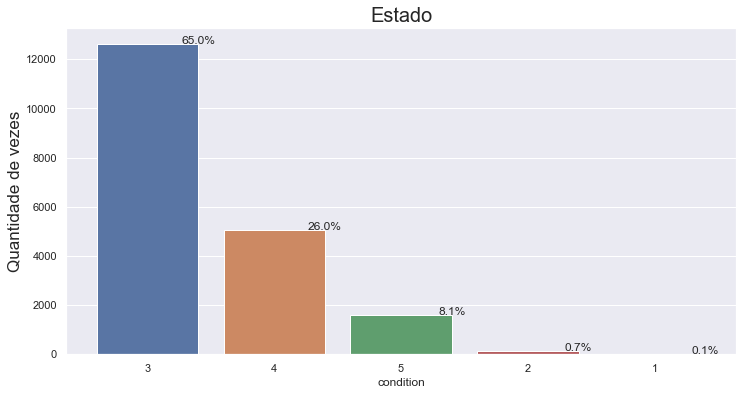

In [23]:
fig,ax = plt.subplots()
sns.set(style='darkgrid')
fig.set_size_inches(12,6)
ax = sns.countplot(x='condition', data=df, order = df['condition'].value_counts().iloc[:10].index)
ax.set_ylabel('Quantidade de vezes',fontsize=17)
ax.set_title('Estado',fontsize=20)

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/df['condition'].count())
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

plt.plot()

A maioria das casas estão como classificação 3 para o estado da moradia

**GRADE**

[]

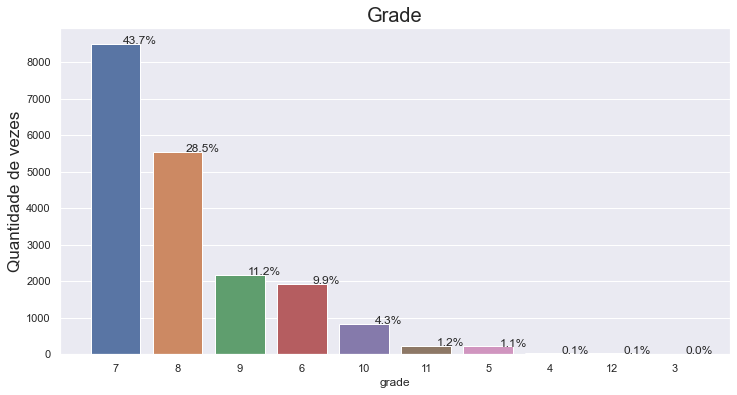

In [24]:
fig,ax = plt.subplots()
sns.set(style='darkgrid')
fig.set_size_inches(12,6)
ax = sns.countplot(x='grade', data=df, order = df['grade'].value_counts().iloc[:10].index)
ax.set_ylabel('Quantidade de vezes',fontsize=17)
ax.set_title('Grade',fontsize=20)

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/df['grade'].count())
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

plt.plot()

Mais da metade das casas estão classficadas com notas entre 6 a 9, em relação ao seu design e contrução

**YR_BUILT**

C:\Users\Vithep\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Ano')

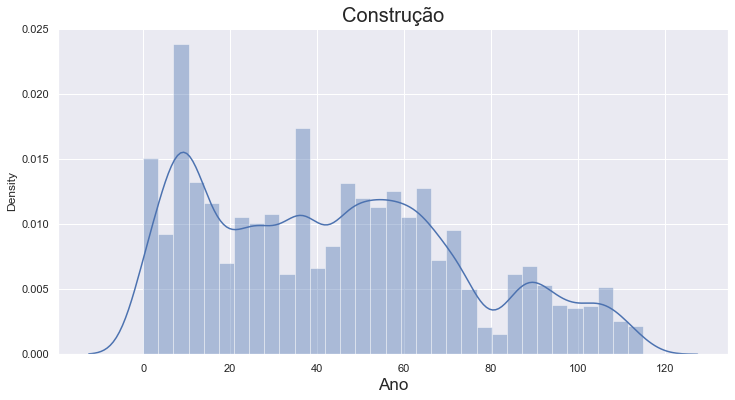

In [25]:
fig,ax = plt.subplots()
sns.set(style='whitegrid')
fig.set_size_inches(12,6)
ax = sns.distplot(df['age_built'])
ax.set_title('Construção',fontsize=20)
ax.set_xlabel('Ano',fontsize=17)

C:\Users\Vithep\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Ano')

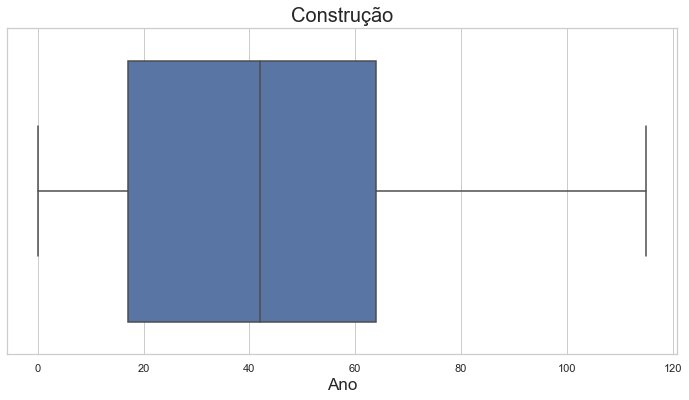

In [26]:
fig,ax = plt.subplots()
sns.set(style='whitegrid')
fig.set_size_inches(12,6)
ax = sns.boxplot(df['age_built'])
ax.set_title('Construção',fontsize=20)
ax.set_xlabel('Ano',fontsize=17)

A maioria das casas vendidas foram construidas entre os anos de 1951 a 1997

**LAT e LON**

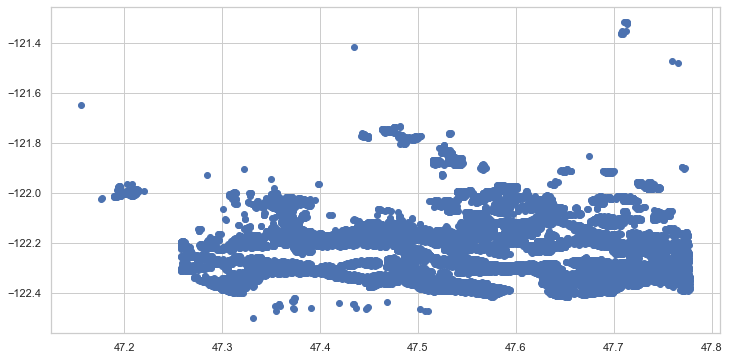

In [27]:
fig,ax = plt.subplots()
sns.set(style='whitegrid')
fig.set_size_inches(12,6)
plt.scatter(x=df['lat'], y=df['long'])
plt.show()